## Step 0: Import libraries and dataset

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing dataset
dataset = pd.read_csv(r"C:\Users\DELL\Downloads\startup_funding.csv")

## Step 1: Understanding the dataset

In [9]:
# Preview dataset

dataset.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [11]:
# Dataset dimensions - (rows, columns)

dataset.shape

(3044, 10)

In [13]:
# Features data-type

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [15]:
# Checking for Null values

(dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Remarks              86.24 %
Amount in USD        31.54 %
SubVertical          30.75 %
City  Location        5.91 %
Industry Vertical     5.62 %
Investors Name        0.79 %
InvestmentnType       0.13 %
Sr No                  0.0 %
Date dd/mm/yyyy        0.0 %
Startup Name           0.0 %
dtype: object

## Step 2: Data Preprocessing

In [23]:
# Replacing the commas in 'Amount in USD' feature

dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

In [24]:
# Fixing the faulty values in 'Amount in USD' feature

dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("unknown", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("14342000+", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))

In [25]:
# Converting to numeric data-type

dataset['Amount in USD'] = pd.to_numeric(dataset['Amount in USD'], errors='coerce')

In [27]:
# Checking for most frequent values in 'Amount in USD'

dataset['Amount in USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

Amount in USD
1000000.0     8.04 %
500000.0      5.23 %
2000000.0     3.34 %
3000000.0      3.2 %
5000000.0      3.2 %
10000000.0    2.91 %
100000.0      2.76 %
150000.0      2.18 %
200000.0      2.13 %
250000.0      1.99 %
Name: proportion, dtype: object

In [29]:
# Replacing 0 in 'Amount in USD' with null values

dataset['Amount in USD'] = dataset['Amount in USD'].replace(0, np.nan)

In [31]:
# Replacing null values with mean

dataset['Amount in USD'].fillna(dataset['Amount in USD'].mean(), inplace = True)

In [33]:
# Fixing the faulty values in 'Date' column

dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '12/05.2015'] = '12/05/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '13/04.2015'] = '13/04/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '15/01.2015'] = '15/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '22/01//2015'] = '22/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '01/07/015'] = '01/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\xc2\\xa010/7/2015'] = '10/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [35]:
# Creating a feature 'Year Month' consisting of year and month

dataset['Year Month'] = (pd.to_datetime(dataset['Date dd/mm/yyyy'], dayfirst=True).dt.year * 100) + pd.to_datetime(dataset['Date dd/mm/yyyy'], dayfirst=True).dt.month


In [37]:
# Dropping the 'Remarks' feature as it contains 86.24% null values

dataset.drop('Remarks', axis = 1, inplace = True)

In [39]:
# Replacing 'Bengaluru' with the more common name 'Bangalore' in the dataset

dataset['City  Location'][dataset['City  Location'] == 'Bengaluru'] = 'Bangalore'

In [41]:
# Replacing 'Undisclosed investors' with a common name 'Undisclosed Investors'

dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'

In [43]:
# Removing the space in 'Ola Cabs' as it gives two different words in WordCloud

dataset['Startup Name'][dataset['Startup Name'] == 'Ola Cabs'] = 'OlaCabs'

In [45]:
# Replacing with more common word

dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed\\\\nFunding'] = 'Seed Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Angel / Seed Funding'] = 'Seed / Angel Funding'

## Step 3: Exploratory Data Analysis

### Q1. How does the funding ecosystem change with time?

In [47]:
# Selecting the most frequent values in 'Year Month'

months = dataset['Year Month'].value_counts().head(20)

In [49]:
print('Average number of fundings each month are',months.values.mean())

Average number of fundings each month are 85.8


In [51]:
print('Minimum number of fundings made in a month are',months.values.min())

Minimum number of fundings made in a month are 71


In [53]:
print('Maximum number of fundings in a month are',months.values.max())

Maximum number of fundings in a month are 104


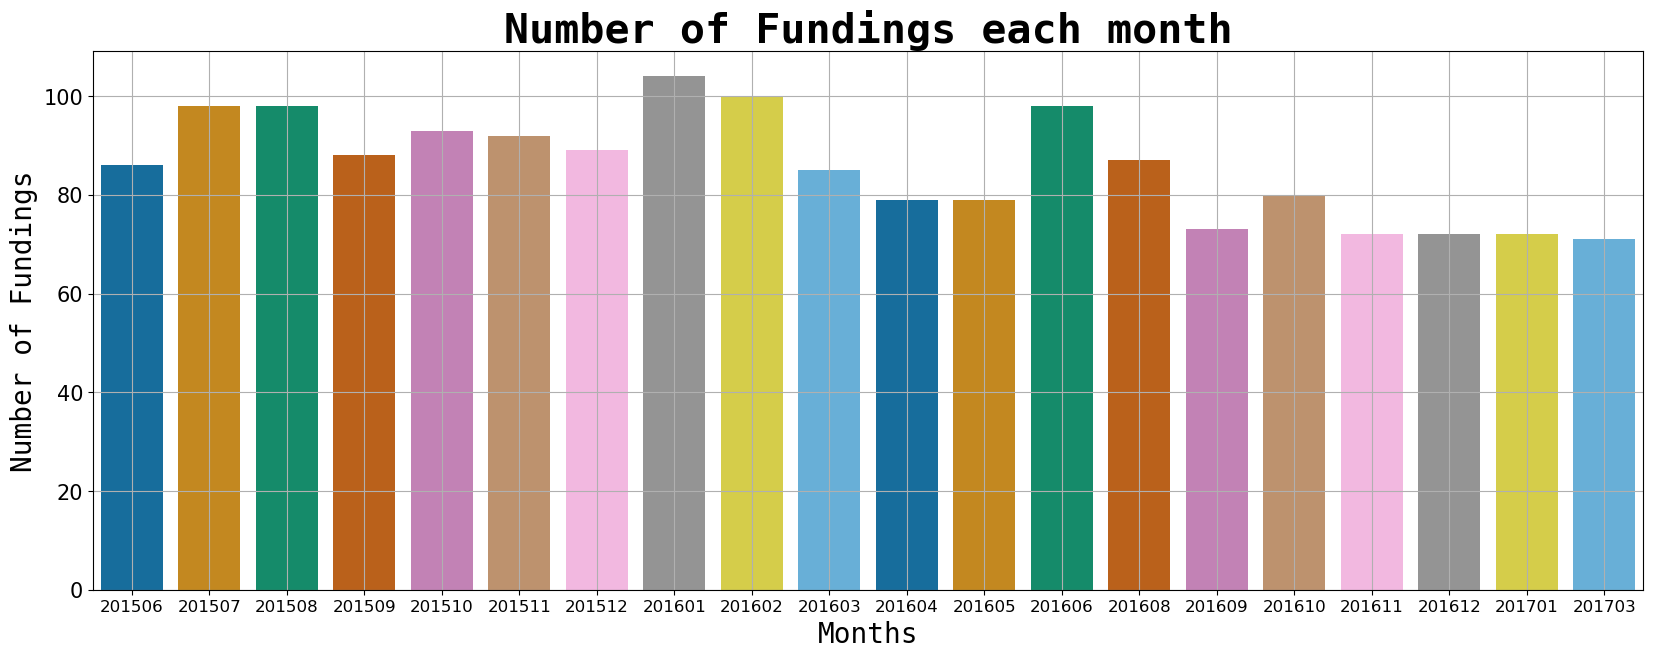

In [55]:
# Creating a barplot for Number of fundings made each month

plt.figure(figsize=(20, 7))
sns.barplot(x=months.index, y=months.values, palette='colorblind')  

# Title and labels with specific font properties
plt.title('Number of Fundings each month', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Months', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Number of Fundings', fontdict={'fontname': 'Monospace', 'fontsize': 20})

# Adjusting tick parameters for better readability
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=15)

# Adding grid for better readability of the plot
plt.grid()

# Displaying the plot
plt.show()


### Q2. Do cities play a major role in funding?

In [57]:
# Selecting top 10 cities 

cities = dataset['City  Location'].value_counts().head(10)

In [59]:
# Preview of frequencies of top 10 cities

cities.values

array([841, 567, 421, 287, 105,  99,  97,  92,  50,  38], dtype=int64)

In [61]:
# Preview of names of top 10 countries

cities.index

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Hyderabad',
       'Chennai', 'Noida', 'Gurugram', 'Ahmedabad'],
      dtype='object', name='City  Location')

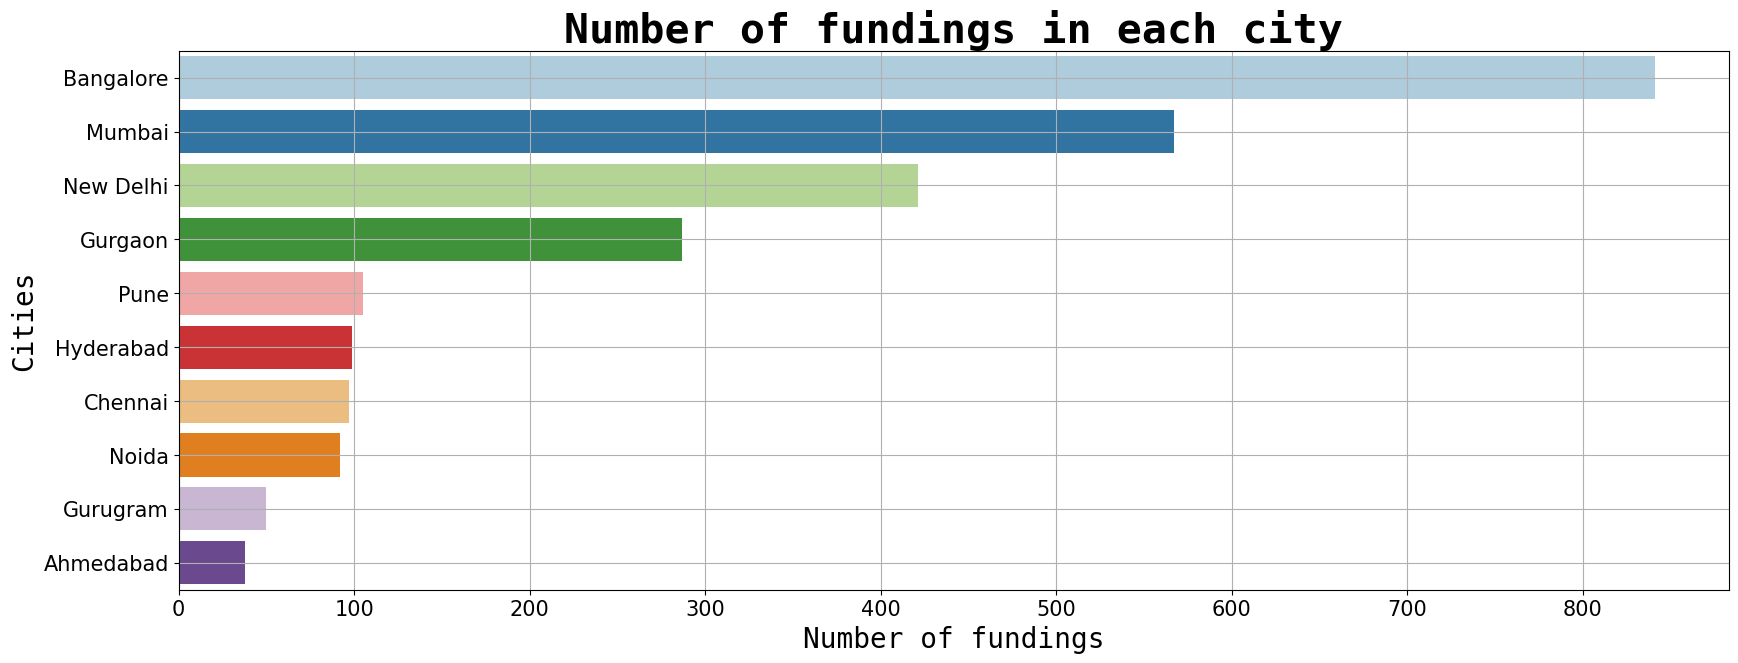

In [63]:
# Creating a barplot for number of fundings made in each city

plt.figure(figsize=(20, 7))
sns.barplot(x=cities.values, y=cities.index, palette='Paired')  

# Title and labels with specific font properties
plt.title('Number of fundings in each city', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Number of fundings', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Cities', fontdict={'fontname': 'Monospace', 'fontsize': 20})

# Adjusting tick parameters for better readability
plt.tick_params(labelsize=15)

# Adding grid for better readability of the plot
plt.grid()

# Displaying the plot
plt.show()


### Q3. Which industries are favoured by investors for funding?

In [65]:
# Selecting the most frequent industries

industry = dataset['Industry Vertical'].value_counts().head(10)

In [67]:
# Preview of frequencies of top 10 industy types

industry.values

array([941, 478, 186,  70,  62,  61,  32,  29,  24,  23], dtype=int64)

In [69]:
# Prevew the names of top 10 industry types

industry.index

Index(['Consumer Internet', 'Technology', 'eCommerce', 'Healthcare', 'Finance',
       'ECommerce', 'Logistics', 'E-Commerce', 'Education', 'Food & Beverage'],
      dtype='object', name='Industry Vertical')

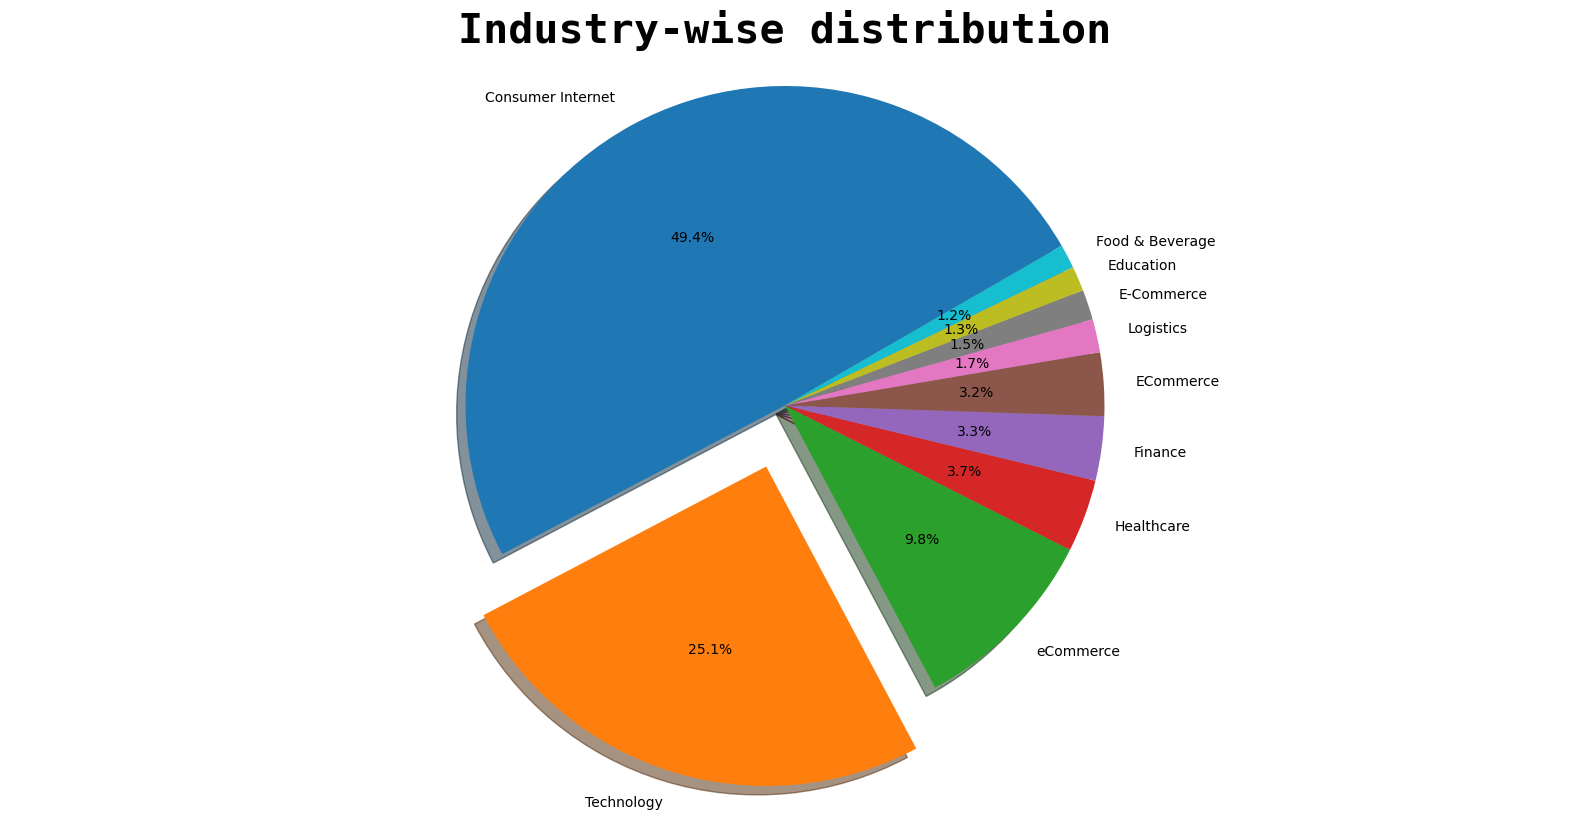

In [71]:
# Creating a pie chart of top 10 industries

plt.figure(figsize = (20, 10))
plt.pie(industry.values, labels = industry.index, startangle = 30, explode = (0 , 0.20, 0, 0, 0, 0, 0, 0, 0, 0), 
        shadow = True, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Industry-wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

In [73]:
# Selecting the most frequent subverticals

subvertical = dataset['SubVertical'].value_counts().head(10)

In [75]:
# Preview of frequencies of top 10 subverticals

subvertical.values

array([11, 10,  8,  5,  5,  5,  5,  5,  4,  4], dtype=int64)

In [77]:
# Preview of names of top 10 subverticals

subvertical.index

Index(['Online Lending Platform', 'Online Pharmacy', 'Food Delivery Platform',
       'Online Education Platform', 'Education', 'Online lending platform',
       'Online Learning Platform', 'Online Lending',
       'Non-Banking Financial Company', 'Online Food Delivery'],
      dtype='object', name='SubVertical')

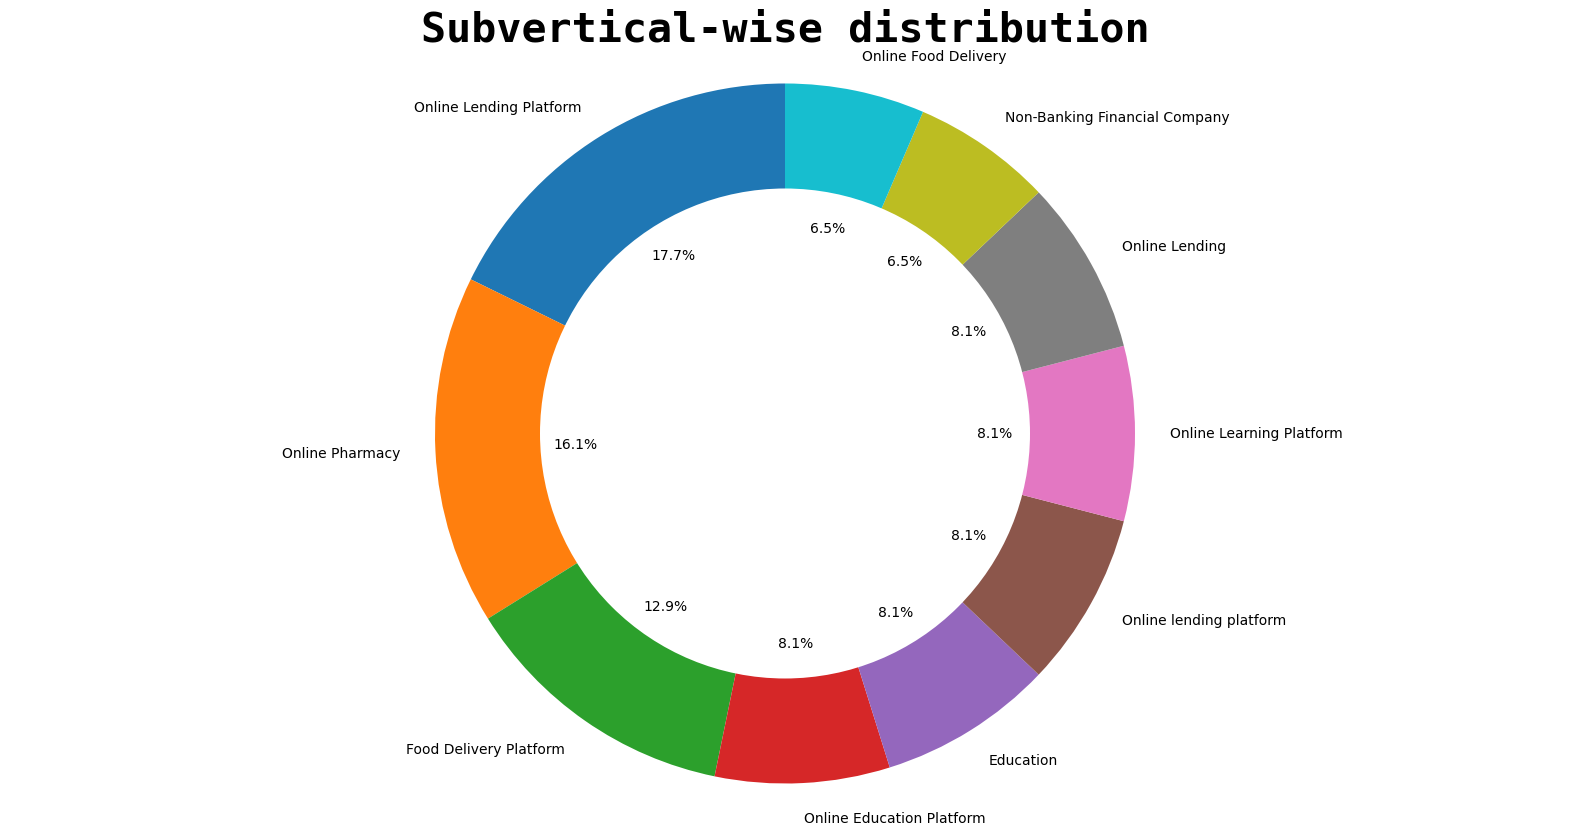

In [104]:
# Creating a donut chart of top 10 Subverticals

plt.figure(figsize = (20, 10))
plt.pie(subvertical.values, labels = subvertical.index, startangle = 90, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Subvertical-wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.show()

### Q4. Who are the most important investors in the Indian Ecosystem?

In [79]:
# Selecting the most frequent investors 

investors = dataset['Investors Name'].value_counts().head(10)

In [81]:
# Preview of frequency of top 10 investors

investors.values

array([103,  25,  23,  16,  15,  15,  12,  11,  11,  10], dtype=int64)

In [83]:
# Preview names of top 10 investors

investors.index

Index(['Undisclosed Investors', 'Ratan Tata', 'Indian Angel Network',
       'Kalaari Capital', 'Group of Angel Investors', 'Sequoia Capital',
       'Accel Partners', 'Venture Catalysts', 'Brand Capital',
       'RoundGlass Partners'],
      dtype='object', name='Investors Name')

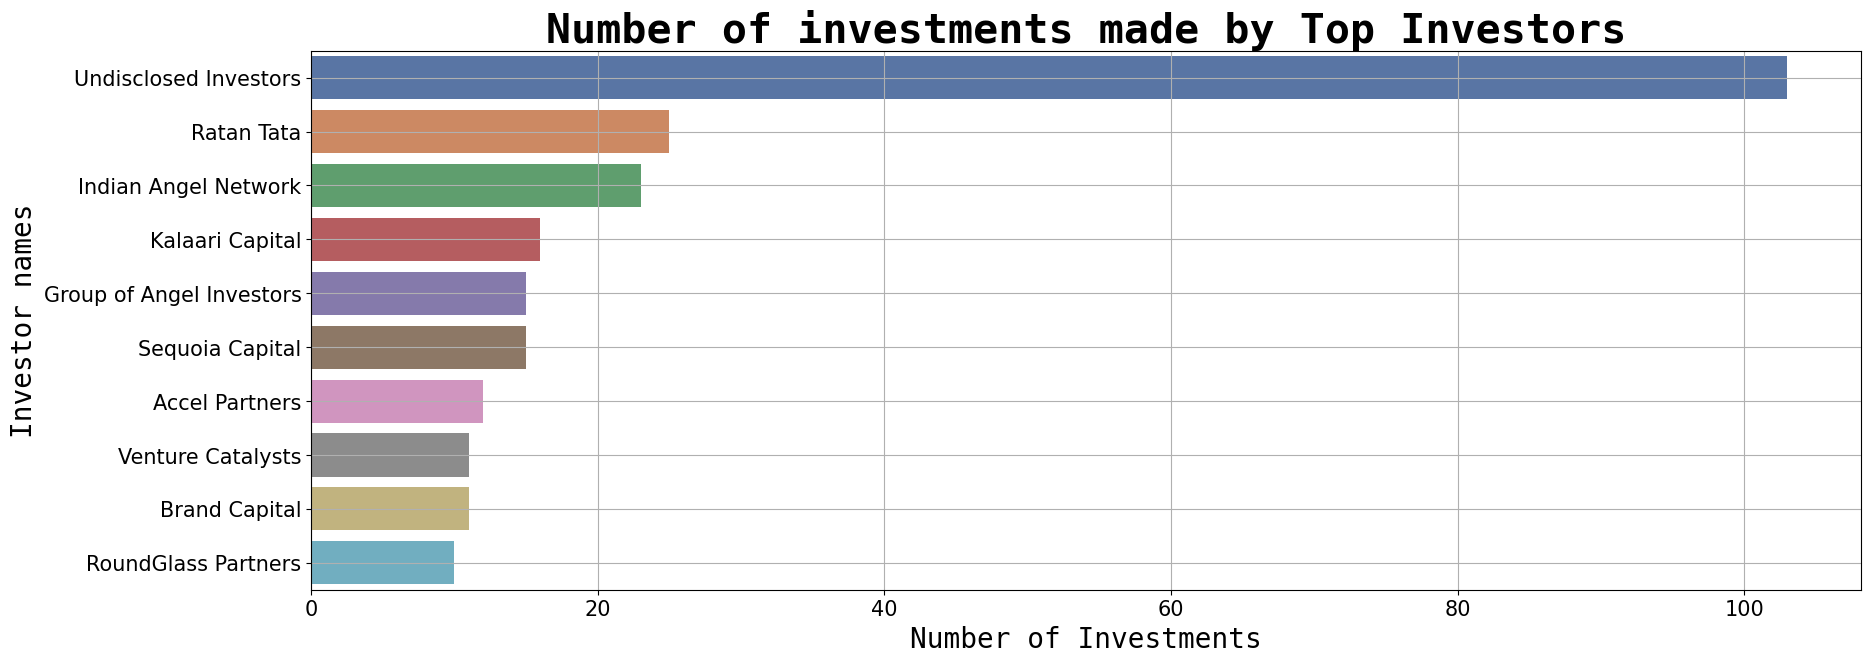

In [85]:
# Create a barplot of top 10 investors

plt.figure(figsize=(20, 7))
sns.barplot(x=investors.values, y=investors.index, palette='deep')  

# Title and labels with specific font properties
plt.title('Number of investments made by Top Investors', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Number of Investments', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Investor names', fontdict={'fontname': 'Monospace', 'fontsize': 20})

# Adjusting tick parameters for better readability
plt.tick_params(labelsize=15)

# Adding grid for better readability of the plot
plt.grid()

# Displaying the plot
plt.show()


### Q5. How much funds do startups generally get in India?

In [87]:
# Preview of top 10 most funded startups

dataset['Amount in USD'].sort_values(ascending = False).head(10)

60      3.900000e+09
651     2.500000e+09
966     1.400000e+09
830     1.400000e+09
31      1.000000e+09
2648    7.000000e+08
2459    6.800000e+08
188     6.000000e+08
33      5.850000e+08
2244    5.000000e+08
Name: Amount in USD, dtype: float64

In [91]:
# Preview of details of top 10 most funded startups

dataset.sort_values(by = 'Amount in USD', ascending = False).head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09,201908
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911


In [93]:
# Calculating average funding received by a startup

dataset['Amount in USD'].mean() 

18429897.27080872

In [95]:
# Preview of least funded startups

dataset['Amount in USD'].sort_values().head(10)

3020    16000.0
3021    16000.0
3019    16000.0
3018    16000.0
3017    16000.0
2933    16600.0
2934    16600.0
2935    16600.0
2936    16600.0
2937    16600.0
Name: Amount in USD, dtype: float64

In [97]:
# Preview of details of least funded startups

dataset.sort_values(by = 'Amount in USD').head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
3020,3021,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3021,3022,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3019,3020,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3018,3019,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3017,3018,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


### Q6. Which are the Startups which have been funded most number of times?

In [99]:
# Selecting the startups funded the most number of times

most_funded = dataset['Startup Name'].value_counts().head(20)

In [128]:
# Preview frequencies

most_funded.values

array([8, 8, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
      dtype=int64)

In [103]:
# Preview names 

most_funded.index

Index(['OlaCabs', 'Swiggy', 'Paytm', 'Meesho', 'Nykaa', 'NoBroker', 'Medinfi',
       'UrbanClap', 'Flipkart', 'Grofers', 'Uniphore', 'Capital Float',
       'Moglix', 'Toppr', 'Jugnoo', 'Icertis', 'Wooplr', 'HolaChef', 'Niki.ai',
       'Coverfox'],
      dtype='object', name='Startup Name')

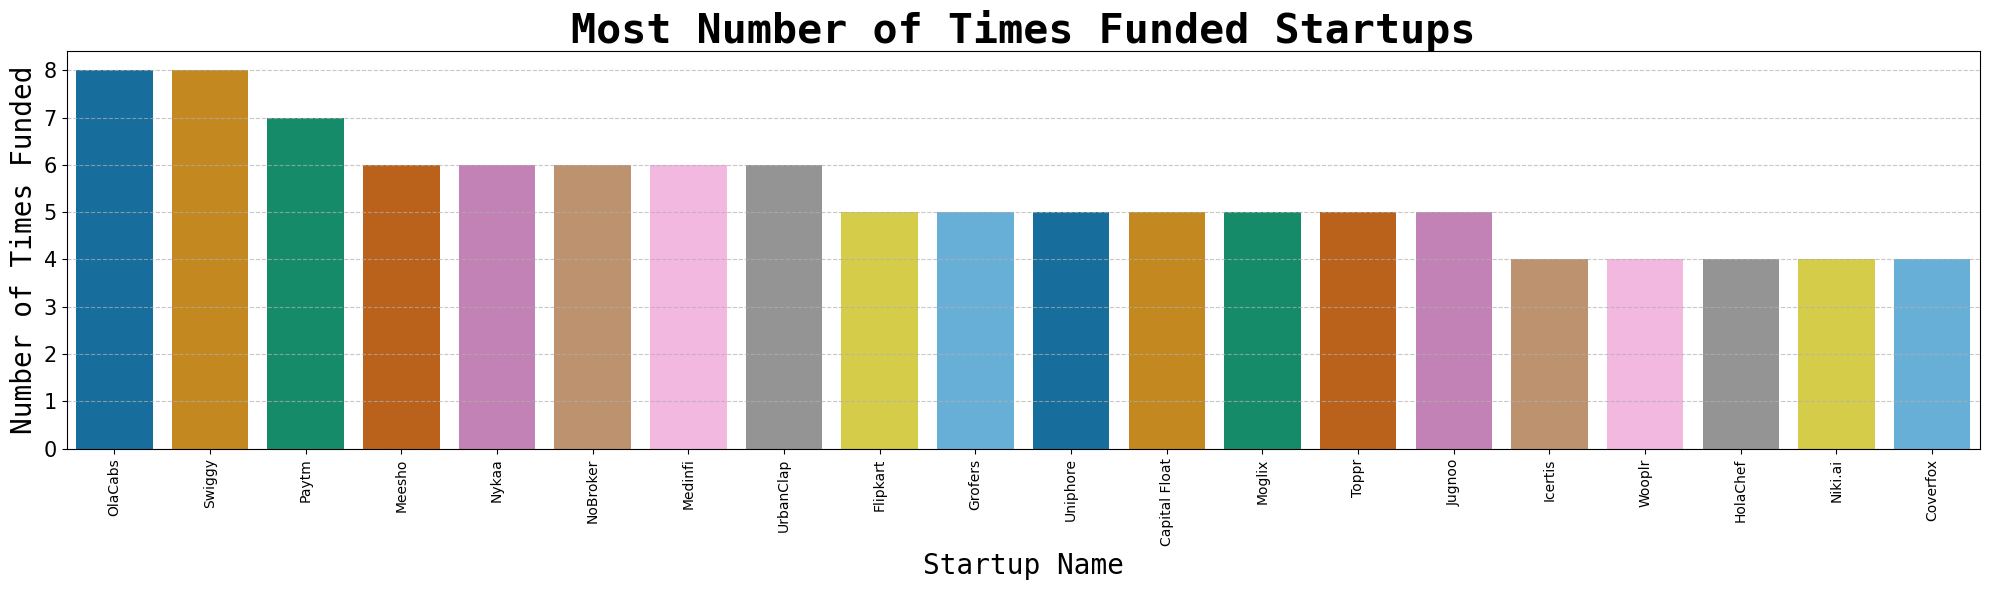

In [105]:
# Creating a barplot of startups funded most number of times

plt.figure(figsize=(20, 6))
sns.barplot(x=most_funded.index, y=most_funded.values, palette='colorblind')
plt.title('Most Number of Times Funded Startups', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Startup Name', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Number of Times Funded', fontdict={'fontname': 'Monospace', 'fontsize': 20})

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels if needed and set font size
plt.yticks(fontsize=15)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Grid only on y-axis with dashed lines
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [111]:
from wordcloud import WordCloud, STOPWORDS

In [113]:
most_funded_1 = dataset['Startup Name'].value_counts().head(30)

In [115]:
names = most_funded_1.index

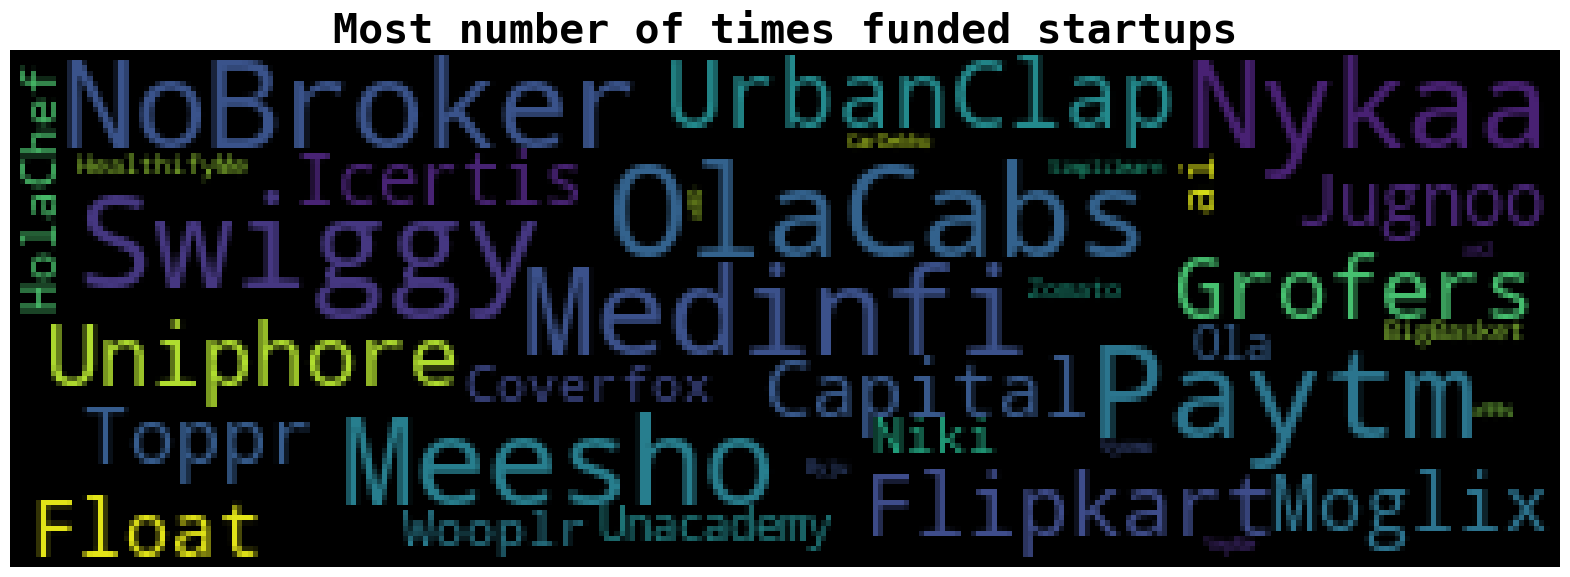

In [117]:
# Creating a wordcloud of startup names
plt.figure(figsize = (20, 7))
wordcloud = WordCloud(max_font_size = 25, width = 300, height = 100).generate(' '.join(names))
plt.title('Most number of times funded startups', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### Q7. What are the different types of funding for startups?

In [119]:
# Preview of types of investments sorted by frequency

dataset['InvestmentnType'].value_counts().head(10)

InvestmentnType
Seed Funding            1385
Private Equity          1356
Seed / Angel Funding     138
Debt Funding              25
Series A                  24
Series B                  20
Series C                  14
Series D                  12
Seed Round                 7
Pre-Series A               4
Name: count, dtype: int64

In [121]:
# Selecting 10 most common investment types

investment_type = dataset['InvestmentnType'].value_counts().head(10)

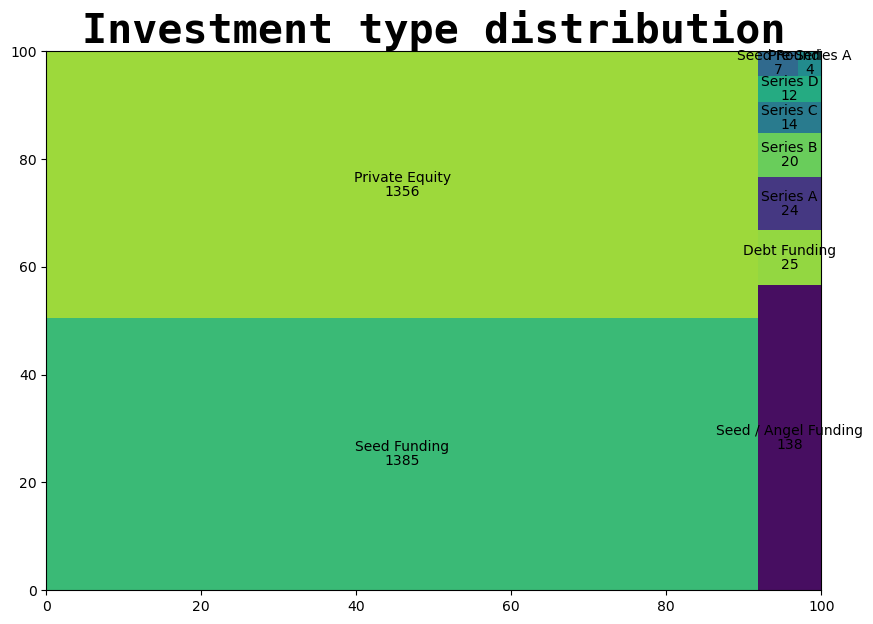

In [127]:
# Creating a Treemap of Investment types

import squarify
plt.figure(figsize = (10, 7))
squarify.plot(sizes = investment_type.values, label = investment_type.index, value = investment_type.values)
plt.title('Investment type distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()